<a href="https://colab.research.google.com/github/Gloou-ui/NM/blob/main/%D0%9B%D0%A0_7_%D0%9B%D0%B8%D1%82%D0%B2%D0%B8%D0%BD_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_17_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зроблено в аудиторії

Перша інтерполяційна формула Ньютона

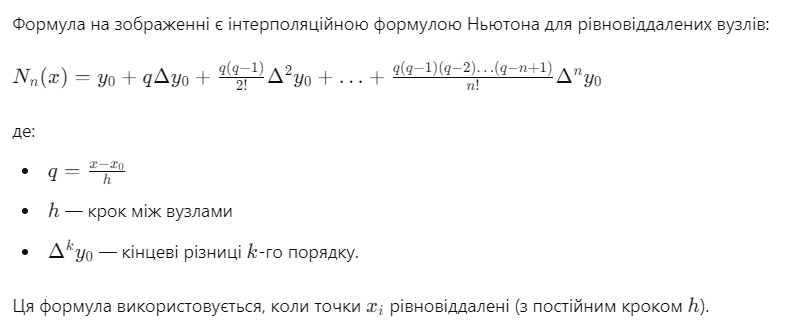

In [ ]:
import numpy as np
from math import factorial

# задані точки
x = np.array([1.340+i*0.005 for i in range(0, 11)])  # задаємо x генератором списків
y = np.array([4.2556, 4.3532, 4.4552, 4.5618, 4.6734, 4.7903, 4.9130, 5.0419, 5.1774, 5.3201, 5.4706,])

print('x =', x)
print('y =', y)

# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans


x1 = 1.361
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

x = [1.34  1.345 1.35  1.355 1.36  1.365 1.37  1.375 1.38  1.385 1.39 ]
y = [4.2556 4.3532 4.4552 4.5618 4.6734 4.7903 4.913  5.0419 5.1774 5.3201
 5.4706]
f(1.361) = 4.696341103860949


Друга інтерполяційна формула Ньютона (інтерполяція назад)

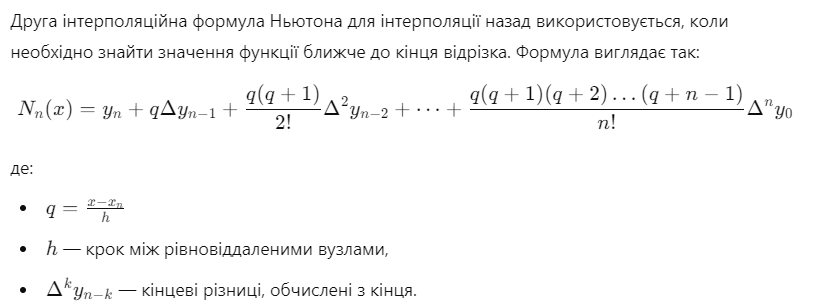

In [ ]:

def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.9
x2 = 1.390 #точка в кінці відрізка
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")

f(1.39) = 5.470599999999993


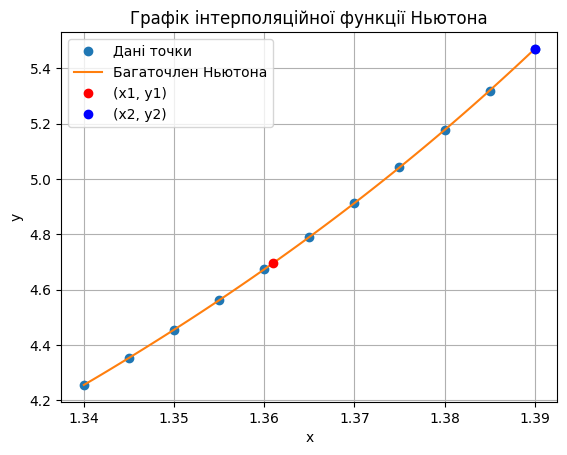

In [ ]:
#import numpy as np
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    # Використовуйте відповідну функцію інтерполяції
    if xx[i] <= x[len(x) // 2]:  # Використовуємо інтерполяцію вперед для першої половини
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:  # Використовуємо інтерполяцію назад для другої половини
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x1, y1, 'ro', label='(x1, y1)')
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()